## Artificial Neural Networks (ANN)
An ANN is a computer system consisting of a collection of connected nodes, called neurons. The neurons are organzed in layers. Each neuron has a number of inputs and one output. It calculates the weighted sum of its inputs, applies a non-linear function to it. This result is the output which is fed to the neurons of the next layer. 
The first layer is called the input layer. This layer is followed by one or more hidden layers. The last layer is the output layer.
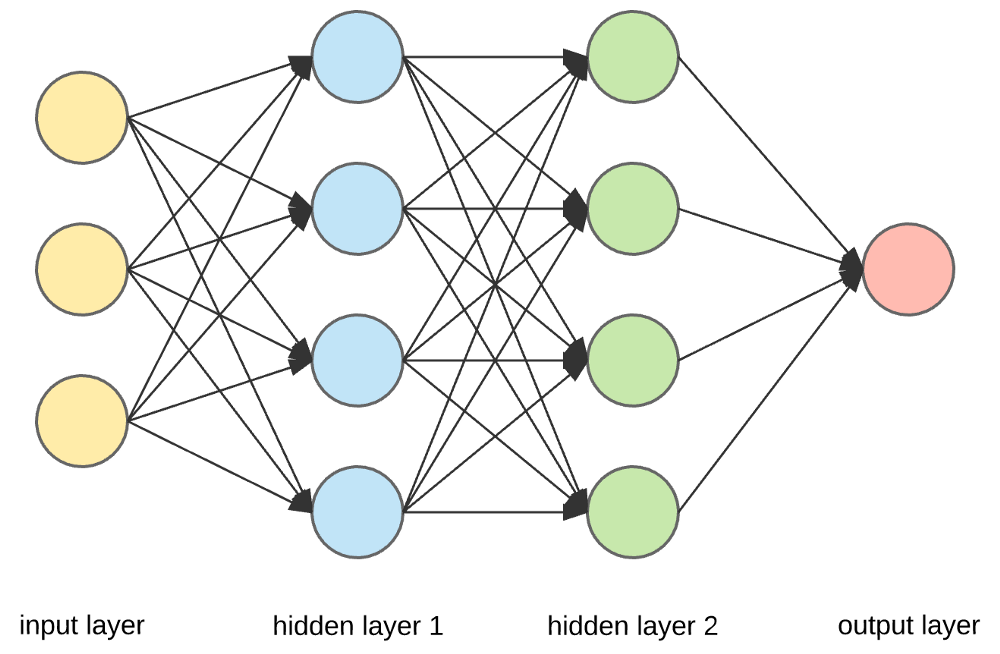 width=400
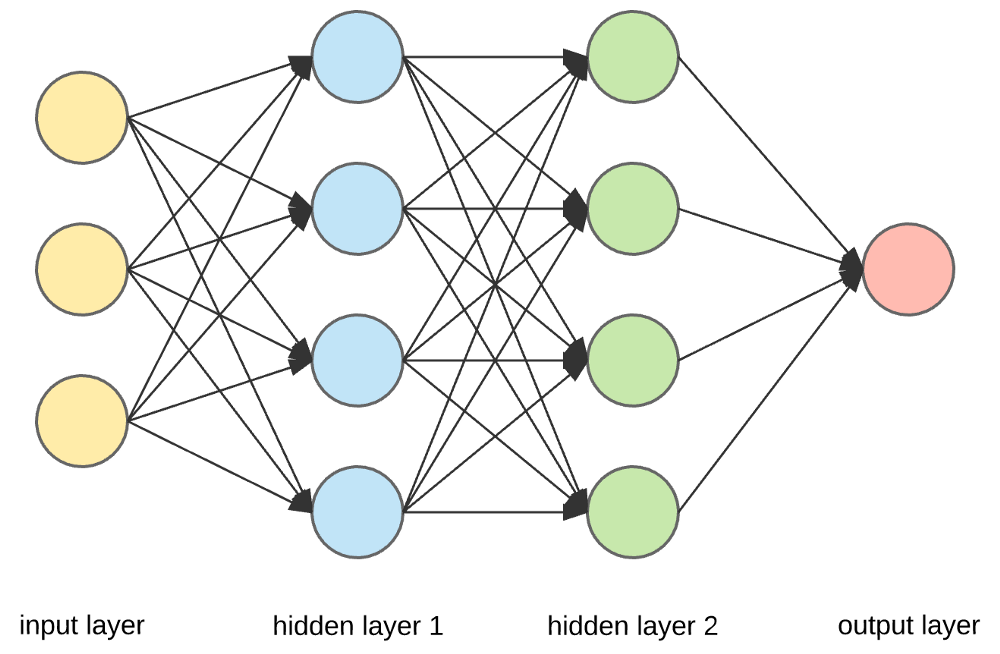
##### Weight Matrix
The weight matrix has a shape of (inputs, outputs)<br>
x has a shape of (inputs, samples)<br>
the bias has a shape of (outputs,1)<br>


$$\left(
 \begin{matrix}
  a & b & c \\
  d & e & f \\
  g & h & i
 \end{matrix}
\right)$$


In [53]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import datetime as dt



def sigmoid(x):
    return(1.0/(1.0+np.exp(-x)))

def sigmoid_derivative(x):
    f=sigmoid(x)
    return f*(1-f)

def sigmoid1(x):
    return x

def sigmoid1_derivative(x):
    return np.ones_like(x)


In [54]:
class NeuralNetwork:
    def __init__(self,x,y, eta=0.03, hidden=4,verbose=False,logfile='nn_log.txt'):
        #np.random.seed(30)
        self.X=x
        self.y=y  
        self.eta=eta
        self.verbose=verbose
        self.m=x.shape[1]
        self.n=x.shape[0]
        self.n1=hidden
        self.n2=y.shape[0]
        self.W1=np.random.randn(self.n1, self.n)
        self.bias1=np.random.randn(self.n1,1)
        self.W2=np.random.randn(self.n2, self.n1)
        self.bias2=np.random.randn(self.n2,1)
        self.A2=np.zeros((self.n2,self.m))
        self.history=[]
        
        if verbose:
            self.log=open(logfile,'w')
            self.log.write("Initializing network\n")
            self.log.write("Learning rate: "+repr(eta)+"\n")
            self.log.write("Number of samples: " +repr(self.m)+"\n")
            self.log.write("Input Layer: " + repr(self.n)+" nodes\n")
            self.log.write("Hidden Layer: " + repr(self.n1)+" nodes\n")
            self.log.write("Output Layer: " + repr(self.n2)+" nodes\n\n")
            self.log.write("Input Shape: " + repr(x.shape)+"\n")
            self.log.write("Input x: \n"+ repr(x)+"\n")
            self.log.write("Labels Shape: " + repr(y.shape)+"\n")
            self.log.write("Labels y:\n"+repr(y)+"\n")      
            self.log.write("W1 Shape: " + repr(self.W1.shape)+" \n")
            self.log.write("W1: \n" + repr(self.W1)+" \n")
            self.log.write("b1 Shape: " + repr(self.bias1.shape)+" \n")
            self.log.write("b1:\n " + repr(self.bias1)+" \n")
            self.log.write("W2 Shape: " + repr(self.W2.shape)+" \n")
            self.log.write("W2: \n" + repr(self.W2)+" \n")
            self.log.write("b2 Shape: " + repr(self.bias2.shape)+" \n")
            self.log.write("b2:\n " + repr(self.bias2)+" \n")
            self.log.flush()
                    
    def to_log(self,msg):
        if self.verbose:
            timestamp=dt.datetime.now()
            self.log.write(str(timestamp) +": " + msg+"\n")
            self.log.flush()

            
    def feedforward(self, debug=False):
        self.to_log("Enter feedforward")
        y=self.predict(self.X, self.y)
        self.history.append(self.cost[0,0]/self.m)
        self.to_log("Exit feedforward")
        
     
    def predict(self,X,y, debug=False):
        self.to_log("Enter predict")
        self.Z1=np.dot(self.W1,X)+self.bias1
        self.A1=sigmoid(self.Z1)
        self.Z2=np.dot(self.W2,self.A1)+self.bias2
        self.A2=sigmoid1(self.Z2)
        self.cost=1/2*np.dot((self.A2-y), (self.A2-y).T)
        self.to_log("Z1:\n"+repr(self.Z1))
        self.to_log("A1:\n"+repr(self.A1))
        self.to_log("Z2:\n"+repr(self.Z2))
        self.to_log("A2:\n"+repr(self.A2))
        self.to_log("Cost:"+repr(self.cost[0,0]))
    
        if (debug):
            print("X {1} ", self.X.shape)
            print("W1 {1} ", self.W1.shape)
            print("Z1 {1} ", self.Z1.shape)
            print("A1 {1} ", self.A1.shape)
            print("W2 {1} ", self.W2.shape)
            print("Z2 {1} ", self.Z2.shape)
            print("A2 {1} ", self.A2.shape)
            print("A1 {1} ", self.A1.shape)
        self.to_log("Exit predict")   
        return self.A2
        
    def backprop(self, debug=False):
        self.to_log("Enter backprop") 
        d_A2=self.A2-self.y
        d_Z2=d_A2*sigmoid1_derivative(self.Z2)
        d_W2=np.dot(d_Z2,self.A1.T)/self.m
        d_A1=np.dot(self.W2.T,d_Z2)
        d_Z1=d_A1*sigmoid_derivative(self.Z1)
        d_W1=np.dot(d_Z1,self.X.T)/self.m
        d_b1=np.sum(d_Z1,axis=1, keepdims=True)/self.m
        d_b2=np.sum(d_Z2,axis=1, keepdims=True)/self.m
        self.to_log("d_A2:\n"+repr(d_A2))
        self.to_log("d_Z2:\n"+repr(d_Z2))
        self.to_log("d_W2:\n"+repr(d_W2))
        self.to_log("d_b2:\n"+repr(d_b2))
        self.to_log("d_A1:\n"+repr(d_A1))
        self.to_log("d_Z1:\n"+repr(d_Z1))
        self.to_log("d_W1:\n"+repr(d_W1))
        self.to_log("d_b1:\n"+repr(d_b1))
        if debug:
            print("d_A2  ", d_A2.shape)
            print("d_Z2  ", d_Z2.shape)
            print("d_A1  ", d_A1.shape)
            print("d_Z1  ", d_Z1.shape)
            print("d_W2  ", d_W2.shape)
            print("d_W1  ", d_W1.shape)
            print("d_b1 ", d_b1.shape) 
            print("d_b2 ", d_b2.shape)
            print("d_W2", d_W2.shape,self.W2.shape)
            assert d_W2.shape ==self.W2.shape, "invalid shape 2"
            assert d_W1.shape ==self.W1.shape, "invalid shape 1"
            print("d_W1", d_W1.shape,self.W1.shape)
        self.W1 -= d_W1 * self.eta 
        self.W2 -= d_W2 * self.eta
        self.bias1 -= d_b1 *self.eta
        self.bias2 -= d_b2 *self.eta
        self.to_log("Exit backprop")
    
    def train(self, debug=False, iteration=0):
        self.to_log("Enter train: iteration=" + repr(iteration))
        self.output=self.feedforward(debug)
        self.backprop(debug)
        if debug:
            print(iteration, self.W1)
            print(iteration, self.W2)
            print(iteration, self.history[-1])
        self.to_log("Exit train: iteration=" + repr(iteration))
        
        #self.loss=np.mean(np.square(self.y-self.output))

    

In [55]:
def debug():
    print("input:",nn.input.shape)
    print("weights1:", nn.weights1.shape)
    print("weights1:")
    print(nn.weights1)
    print("weights2:", nn.weights2.shape)
    print("weights2:")
    print(nn.weights2)
    print("layer1:", nn.layer1.shape)
    print("layer1:")
    print(nn.layer1)
    print("output:", nn.output.shape)
    print("output:")
    print(nn.output)
    print("---------------------------")

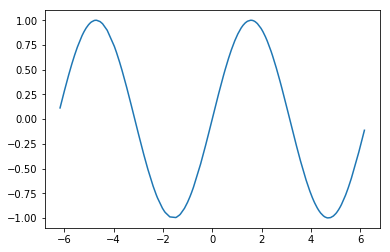

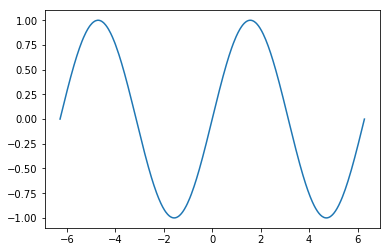

(1, 800) (1, 800)
(1, 200) (1, 200)
0 2.2730843114607193 0.7586702579723653 1.5144140534883541
1 0.882660866504462 0.41574560011895445 0.4669152663855075
2 0.4990577762221163 0.3209705598742324 0.17808721634788388
3 0.3809448775846432 0.2905541585698055 0.0903907190148377
4 0.3368412638225194 0.27788977287799627 0.05895149094452312
5 0.31563199078618664 0.2707770046577405 0.04485498612844613
6 0.30279216165882 0.26573772326440037 0.03705443839441963
7 0.29367466929660346 0.2616056226273097 0.03206904666929378
8 0.2865068238953265 0.2579015370287564 0.0286052868665701
9 0.2804734617708978 0.2543961394654824 0.02607732230541543
10 0.2751432181062322 0.2509736372764084 0.02416958082982379
11 0.2702688745295489 0.2475780205778515 0.0226908539516974
12 0.26570336140168777 0.2441864692626873 0.02151689213900046
13 0.2613579027978481 0.24079437368088194 0.020563529116966156
14 0.25717872863435526 0.2374065292521421 0.019772199382213168
15 0.25313334555837114 0.2340319821232778 0.0191013634350

131 0.08866414001361658 0.08685937429078057 0.0018047657228360131
132 0.08818664775482864 0.08644810570769756 0.0017385420471310725
133 0.08771532798409173 0.0860421788709356 0.001673149113156136
134 0.08725007590549218 0.08564149645842893 0.0016085794470632464
135 0.0867907885519899 0.0852459631966404 0.0015448253553494995
136 0.08633736477986391 0.084855485833718 0.0014818789461459037
137 0.08588970526084372 0.0844699731112458 0.0014197321495979243
138 0.08544771247207632 0.08408933573474543 0.0013583767373308853
139 0.08501129068407763 0.08371348634308008 0.0012978043409975493
140 0.08458034594681801 0.0833423394769046 0.0012380064699134136
141 0.08415478607408822 0.0829758115463008 0.0011789745277874103
142 0.08373452062629072 0.08261382079772762 0.001120699828563096
143 0.08331946089179634 0.08225628728040975 0.0010631736113865947
144 0.08290951986700218 0.08190313281228036 0.0010063870547218218
145 0.08250461223522187 0.08155428094558644 0.0009503312896354393
146 0.08210465434453

256 0.05654371997319235 0.05895311907629473 0.0024093991031023804
257 0.05641363734386726 0.0588379925967296 0.002424355252862345
258 0.05628467748321842 0.058723833424684936 0.0024391559414665143
259 0.05615682836417564 0.0586106313779613 0.0024538030137856576
260 0.05603007811381449 0.0584983763998119 0.002468298285997407
261 0.05590441501078633 0.05838705855688567 0.002482643546099339
262 0.05577982748280642 0.05827666803721983 0.002496840554413411
263 0.05565630410419887 0.058167195148279775 0.002510891044080907
264 0.05553383359349655 0.05805863031504517 0.0025247967215486222
265 0.055412404811094544 0.057950964078140696 0.002538559267046152
266 0.055292006756955725 0.05784418709201031 0.0025521803350545824
267 0.05517262856836693 0.05773829012313342 0.0025656615547664866
268 0.05505425951774434 0.05763326404828207 0.0025790045305377277
269 0.05493688901048685 0.057529099852817886 0.002592210842331036
270 0.05482050658287584 0.05742578862902695 0.002605282046151104
271 0.054705101

381 0.04623899233487856 0.049708188866380024 0.0034691965315014617
382 0.04618882203594735 0.049662098176671755 0.0034732761407244087
383 0.0461389813261121 0.04961629077758814 0.003477309451476042
384 0.04608946724629513 0.049570764083866965 0.003481296837571833
385 0.046040276867936436 0.049525515537133316 0.00348523866919688
386 0.04599140729265866 0.049480542605615324 0.003489135312956665
387 0.04594285565193614 0.04943584278386312 0.0034929871319269792
388 0.0458946191067679 0.04939141359247087 0.0034967944857029754
389 0.04584669484735457 0.04934725257780188 0.003500557730447308
390 0.04579908009277907 0.04930335731171664 0.0035042772189375695
391 0.045751772090691194 0.04925972539130412 0.0035079533006129246
392 0.045704768116995906 0.0492163544386156 0.0035115863216196933
393 0.045658065475545226 0.049173242100401804 0.003515176624856578
394 0.045611661497834036 0.049130386047852796 0.0035187245500187606
395 0.04556555354269905 0.049087783976340386 0.0035222304336413393
396 0.0

507 0.04178947026177204 0.045502604612508615 0.0037131343507365785
508 0.04176487064573876 0.045478368065885705 0.003713497420146948
509 0.04174038896276416 0.04545423228617069 0.003713843323406525
510 0.041716024368685975 0.045430196569846926 0.0037141722011609507
511 0.04169177602728368 0.04540626022043526 0.003714484193151575
512 0.041667643110194684 0.045382422548416984 0.0037147794382223
513 0.041643624796831265 0.04535868287115795 0.003715058074326684
514 0.04161972027429856 0.0453350405128329 0.0037153202385343392
515 0.04159592873731319 0.04531149480435114 0.003715566067037955
516 0.04157224938812288 0.04528804508328252 0.003715795695159639
517 0.04154868143642689 0.045264690693784276 0.0037160092573573847
518 0.04152522409929722 0.045241430986528774 0.003716206887231552
519 0.0415018766011006 0.04521826531863174 0.0037163887175311397
520 0.041478638173421414 0.045195193053581356 0.003716554880159942
521 0.04145550805498537 0.04517221356116797 0.0037167055061825965
522 0.041432

632 0.03942103543300711 0.04308371235418198 0.003662676921174869
633 0.03940651490695581 0.043068261950012746 0.003661747043056933
634 0.03939204842560416 0.04305286053762518 0.003660812112021017
635 0.03937763569660479 0.04303750788621829 0.0036598721896135
636 0.039363276429730615 0.04302220376666125 0.0036589273369306355
637 0.03934897033685369 0.04300694795147415 0.0036579776146204654
638 0.03933471713192413 0.04299174021480927 0.0036570230828851386
639 0.039320516530949395 0.04297658033243248 0.0036560638014830824
640 0.03930636825197385 0.04296146808170485 0.003655099829730994
641 0.039292272015058444 0.04294640324156473 0.003654131226506284
642 0.0392782275422607 0.042931385592509586 0.003653158050248885
643 0.03926423455761501 0.04291641491657872 0.003652180358963711
644 0.03925029278711304 0.04290149099733559 0.003651198210222549
645 0.03923640195868444 0.04288661361985075 0.0036502116611663096
646 0.03922256180217774 0.042871782570684865 0.0036492207685071276
647 0.0392087720

758 0.0379389581086359 0.04146071420160867 0.0035217560929727693
759 0.03792947208213705 0.041450020437104954 0.0035205483549679006
760 0.03792001499146705 0.04143935542917029 0.0035193404377032375
761 0.03791058670334225 0.04142871906507113 0.003518132361728883
762 0.03790118708520493 0.04141811123258951 0.0035169241473845814
763 0.03789181600521827 0.041407531820019515 0.003515715814801243
764 0.037882473332261475 0.04139698071616411 0.003514507383902632
765 0.037873158935924835 0.041386457810331734 0.003513298874406899
766 0.03786387268650502 0.04137596299233303 0.003512090305828011
767 0.03785461445500026 0.04136549615247768 0.0035108816974774165
768 0.03784538411310561 0.04135505718157122 0.003509673068465606
769 0.037836181533208293 0.04134464597091188 0.0035084644377035845
770 0.03782700658838312 0.041334262412287444 0.0035072558239043206
771 0.037817859152387806 0.041323906397972295 0.0035060472455844885
772 0.037808739099658525 0.041313577820724215 0.0035048387210656895
773 0.

885 0.03692776062314795 0.0402997394401946 0.0033719788170466503
886 0.036921083509955724 0.040291940537764484 0.00337085702780876
887 0.03691442293692289 0.04028415937250546 0.003369736435582568
888 0.036907778834607885 0.04027639587897455 0.0033686170443666674
889 0.036901151133908135 0.04026864999199937 0.0033674988580912335
890 0.03689453976605806 0.04026092164667668 0.0033663818806186213
891 0.03688794466262729 0.040253210778371656 0.003365266115744364
892 0.03688136575551882 0.040245517322716216 0.003364151567197396
893 0.03687480297696713 0.04023784121560822 0.0033630382386410917
894 0.03686825625953638 0.04023018239321014 0.0033619261336737608
895 0.03686172553611859 0.04022254079194784 0.0033608152558292498
896 0.03685521073993184 0.04021491634850964 0.0033597056085778038
897 0.03684871180451845 0.04020730899984492 0.003358597195326468
898 0.036842228663743225 0.04019971868316313 0.003357490019419908
899 0.03683576125179169 0.04019214533593257 0.0033563840841408787
900 0.03682

1010 0.03620213499272032 0.03944391096300079 0.0032417759702804694
1011 0.03619707907148958 0.03943789757999299 0.0032408185085034125
1012 0.036192033134407865 0.03943189551762357 0.0032398623832157053
1013 0.0361869971428074 0.03942590473647625 0.0032389075936688494
1014 0.03618197105819232 0.03941992519728974 0.0032379541390974223
1015 0.03617695484223764 0.03941395686095681 0.0032370020187191748
1016 0.03617194845678848 0.03940799968852375 0.0032360512317352735
1017 0.03616695186385904 0.03940205364118966 0.0032351017773306207
1018 0.03616196502563183 0.03939611868030565 0.0032341536546738256
1019 0.03615698790445663 0.039390194767374306 0.003233206862917677
1020 0.03615202046284973 0.03938428186404888 0.0032322614011991505
1021 0.036147062663493 0.03937837993213261 0.003231317268639615
1022 0.03614211446923298 0.039372488933578115 0.003230374464345133
1023 0.03613717584308005 0.03936660883048663 0.0032294329874065775
1024 0.03613224674820757 0.03936073958510743 0.003228492836899854

1134 0.03564077604605248 0.03877366633344441 0.003132890287391929
1135 0.035636709067668304 0.03876879820453308 0.003132089136864774
1136 0.03563264834914948 0.03876393749836856 0.003131289149219077
1137 0.03562859386755434 0.038759084190242744 0.0031304903226884034
1138 0.035624545600031914 0.038754238255535874 0.00312969265550396
1139 0.03562050352382155 0.03874939966971604 0.00312889614589449
1140 0.03561646761625242 0.0387445684083388 0.0031281007920863774
1141 0.03561243785474311 0.03873974444704678 0.0031273065923036678
1142 0.03560841421680113 0.03873492776156943 0.0031265135447682973
1143 0.035604396680022576 0.03873011832772236 0.0031257216476997807
1144 0.03560038522209157 0.03872531612140723 0.0031249308993156547
1145 0.035596379820779935 0.03872052111861121 0.0031241412978312774
1146 0.03559238045394672 0.03871573329540668 0.00312335284145996
1147 0.035588387099537745 0.038710952627950795 0.00312256552841305
1148 0.03558439973558524 0.038706179092485166 0.003121779356899924

1257 0.03518129978231741 0.0382238262559878 0.0030425264736703914
1258 0.035177854524636454 0.038219709266936304 0.00304185474229985
1259 0.035174413270537885 0.03821559722061086 0.0030411839500729745
1260 0.03517097600553025 0.03821149010071894 0.0030405140951886914
1261 0.035167542715172896 0.038207387891019934 0.0030398451758470377
1262 0.03516411338507568 0.03820329057532478 0.0030391771902490983
1263 0.03516068800089881 0.038199198137495886 0.003038510136597075
1264 0.035157266548352516 0.03819511056144681 0.0030378440130942944
1265 0.03515384901319694 0.03819102783114213 0.0030371788179451922
1266 0.03515043538124182 0.0381869499305972 0.0030365145493553847
1267 0.03514702563834633 0.038182876843877854 0.0030358512055315215
1268 0.0351436197704188 0.03817880855510037 0.003035188784681571
1269 0.035140217763416554 0.03817474504843106 0.003034527285014507
1270 0.03513681960334563 0.03817068630808621 0.0030338667047405815
1271 0.0351334252762606 0.03816663231833186 0.003033207042071

1381 0.03478055422248141 0.037746401500458875 0.002965847277977468
1382 0.03477750871768381 0.0377427873971667 0.0029652786794828953
1383 0.03477446574482815 0.03773917655226177 0.0029647108074336223
1384 0.03477142529426512 0.03773556895447828 0.0029641436602131574
1385 0.03476838735637453 0.0377319645925813 0.0029635772362067714
1386 0.03476535192156531 0.03772836345536668 0.0029630115338013727
1387 0.034762318980275264 0.037724765531660764 0.0029624465513855003
1388 0.034759288522971034 0.03772117081032044 0.002961882287349407
1389 0.03475626054014791 0.03771757928023287 0.002961318740084963
1390 0.034753235022329736 0.03771399093031546 0.0029607559079857237
1391 0.03475021196006877 0.03771040574951568 0.0029601937894469105
1392 0.03474719134394555 0.03770682372681099 0.0029596323828654375
1393 0.03474417316456877 0.0377032448512086 0.002959071686639829
1394 0.03474115741257518 0.03769966911174548 0.002958511699170302
1395 0.03473814407862941 0.03769609649748813 0.002957952418858725

1507 0.034413881470612154 0.037313296396690614 0.00289941492607846
1508 0.034411087313082844 0.03731001297504657 0.0028989256619637235
1509 0.03440829466372269 0.03730673159705575 0.002898436933333061
1510 0.034405503515678906 0.03730345225444641 0.002897948738767503
1511 0.03440271386211485 0.03730017493896441 0.0028974610768495584
1512 0.03439992569620985 0.03729689964237292 0.0028969739461630686
1513 0.034397139011159206 0.03729362635645248 0.0028964873452932763
1514 0.03439435380017405 0.037290355073000866 0.002896001272826819
1515 0.034391570056481295 0.03728708578383297 0.0028955157273516732
1516 0.03438878777332352 0.03728381848078082 0.002895030707457301
1517 0.034386006943958936 0.03728055315569338 0.0028945462117344473
1518 0.03438322756166129 0.03727728980043652 0.0028940622387752316
1519 0.03438044961971974 0.03727402840689289 0.002893578787173147
1520 0.03437767311143885 0.03727076896696195 0.002893095855523102
1521 0.034374898030138434 0.037267511472559765 0.0028926134424

1631 0.0340769156293652 0.036919317627953245 0.002842401998588047
1632 0.034074260501413066 0.03691622921322051 0.0028419687118074466
1633 0.03407160613140779 0.03691314192545467 0.002841535794046876
1634 0.034068952513939044 0.03691005575797064 0.002841103244031598
1635 0.034066299643604143 0.03690697070409202 0.0028406710604878746
1636 0.034063647515008 0.03690388675715083 0.002840239242142835
1637 0.03406099612276309 0.03690080391048761 0.0028398077877245242
1638 0.03405834546148936 0.03689772215745127 0.0028393766959619107
1639 0.03405569552581417 0.036894641491399094 0.002838945965584927
1640 0.034053046310372315 0.036891561905696604 0.0028385155953242897
1641 0.034050397809805864 0.0368884833937176 0.0028380855839117355
1642 0.0340477500187642 0.03688540594884401 0.002837655930079813
1643 0.03404510293190387 0.03688232956446594 0.0028372266325620704
1644 0.03404245654388863 0.03687925423398144 0.0028367976900928113
1645 0.03403981084938933 0.036876179950796645 0.00283636910140731

1755 0.033751842214618646 0.03654294340990887 0.0027911011952902257
1756 0.033749241711761774 0.036539945914434935 0.002790704202673161
1757 0.03374664133903318 0.03653694876614979 0.0027903074271166117
1758 0.0337440410916115 0.03653395195905109 0.002789910867439592
1759 0.0337414409646778 0.036530955487139416 0.0027895145224616155
1760 0.03373884095341539 0.03652795934441835 0.0027891183910029593
1761 0.033736241053009916 0.03652496352489449 0.0027887224718845735
1762 0.0337336412586493 0.036521968022577324 0.0027883267639280257
1763 0.03373104156552367 0.036518972831479285 0.002787931265955612
1764 0.033728441968825386 0.03651597794561562 0.0027875359767902327
1765 0.03372584246374898 0.03651298335900449 0.002787140895255509
1766 0.033723243045491146 0.03650998906566693 0.0027867460201757843
1767 0.033720643709250736 0.036506995059626665 0.002786351350375929
1768 0.03371804445022865 0.036504001334910295 0.0027859568846816465
1769 0.03371544526362792 0.03650100788554712 0.00278556262

1878 0.03343151420251383 0.03617506299600281 0.0027435487934889813
1879 0.033428894052821574 0.03617206391435848 0.002743169861536908
1880 0.03342627345222499 0.036169064459503956 0.0027427910072789635
1881 0.03342365239608122 0.0361660646257273 0.0027424122296460796
1882 0.03342103087974904 0.03616306440731956 0.00274203352757052
1883 0.033418408898588804 0.036160063798574824 0.0027416548999860194
1884 0.03341578644796248 0.03615706279379032 0.0027412763458278394
1885 0.03341316352323373 0.03615406138726638 0.00274089786403265
1886 0.033410540119767844 0.03615105957330644 0.0027405194535385993
1887 0.03340791623293189 0.03614805734621724 0.002740141113285348
1888 0.03340529185809457 0.036145054700308744 0.002739762842214173
1889 0.03340266699062642 0.036142051629894235 0.0027393846392678167
1890 0.03340004162589973 0.03613904812929023 0.002739006503390498
1891 0.03339741575928859 0.03613604419281673 0.002738628433528137
1892 0.03339478938616895 0.03613303981479712 0.002738250428628165

2004 0.03309633795128055 0.035792423885850175 0.002696085934569624
2005 0.03309362533540289 0.03578933436284207 0.0026957090274391804
2006 0.03309091171048114 0.0357862437916157 0.002695332081134559
2007 0.03308819707248513 0.03578315216742905 0.0026949550949439197
2008 0.03308548141739503 0.03578005948555536 0.0026945780681603346
2009 0.033082764741201594 0.035776965741283334 0.0026942010000817404
2010 0.033080047039906156 0.03577387092991717 0.0026938238900110142
2011 0.033077328309520856 0.035770775046776934 0.0026934467372560777
2012 0.03307460854606868 0.03576767808719853 0.0026930695411298486
2013 0.03307188774558369 0.03576458004653405 0.0026926923009503584
2014 0.03306916590411109 0.03576148092015179 0.002692315016040704
2015 0.03306644301770734 0.03575838070343661 0.0026919376857292635
2016 0.03306371908244036 0.035755279391789886 0.0026915603093495277
2017 0.033060994094389604 0.03575217698062989 0.00269118288624029
2018 0.033058268049646226 0.03574907346539187 0.002690805415

2128 0.03275115879817967 0.035400045054831075 0.0026488862566514046
2129 0.032748294941619877 0.035396795966326326 0.0026485010247064497
2130 0.032745429703252296 0.03539354542100783 0.002648115717755535
2131 0.03274256308157472 0.03539029341765568 0.0026477303360809556
2132 0.03273969507511735 0.03538703995509394 0.0026473448799765875
2133 0.03273682568244303 0.03538378503219093 0.0026469593497479016
2134 0.032733954902147436 0.035380528647859524 0.0026465737457120886
2135 0.03273108273285933 0.035377270801057376 0.002646188068198045
2136 0.0327282091732407 0.035374011490787186 0.002645802317546485
2137 0.03272533422198707 0.03537075071609705 0.0026454164941099798
2138 0.0327224578778276 0.03536748847608057 0.0026450305982529745
2139 0.03271958013952537 0.03536422476987729 0.002644644630351918
2140 0.03271670100587757 0.035360959596672854 0.0026442585907952842
2141 0.03271382047571572 0.035357692955699266 0.0026438724799835445
2142 0.03271093854790585 0.035354424846235216 0.0026434862

2252 0.03238538683038124 0.03498613993760077 0.002600753107219529
2253 0.03238235209743142 0.034982716875306845 0.0026003647778754246
2254 0.03237931610353359 0.03497929261459966 0.0025999765110660683
2255 0.032376278852583304 0.0349758671613967 0.0025995883088133984
2256 0.03237324034852696 0.03497244052168104 0.0025992001731540773
2257 0.03237020059536186 0.03496901270150121 0.002598812106139353
2258 0.03236715959713615 0.034965583706971344 0.0025984241098351915
2259 0.03236411735794894 0.03496215354427101 0.002598036186322074
2260 0.032361073881950184 0.03495872221964525 0.0025976483376950674
2261 0.03235802917334078 0.03495528973940459 0.002597260566063804
2262 0.03235498323637254 0.034951856109924885 0.0025968728735523416
2263 0.032351936075348184 0.03494842133764742 0.0025964852622992335
2264 0.03234888769462135 0.034944985429078694 0.0025960977344573408
2265 0.03234583809859656 0.03494154839079061 0.002595710292194048
2266 0.03234278729172923 0.03493811022942016 0.00259532293769

2375 0.03200428354349991 0.034558474049724584 0.002554190506224671
2376 0.032001137742511544 0.03455496664867607 0.0025538289061645264
2377 0.03199799151485533 0.03455145922055489 0.002553467705699565
2378 0.03199484486974715 0.0345479517777597 0.0025531069080125465
2379 0.03199169781642943 0.03454444433271672 0.0025527465162872923
2380 0.03198855036417079 0.03454093689787895 0.0025523865337081647
2381 0.03198540252226564 0.03453742948572576 0.002552026963460123
2382 0.03198225430003371 0.03453392210876204 0.002551667808728335
2383 0.03197910570681974 0.03453041477951799 0.002551309072698245
2384 0.03197595675199301 0.034526907510548106 0.002550950758555097
2385 0.03197280744494693 0.03452340031443092 0.002550592869483989
2386 0.03196965779509868 0.03451989320376825 0.0025502354086695683
2387 0.031966507811888714 0.03451638619118465 0.0025498783792959334
2388 0.03196335750478042 0.034512879289326726 0.002549521784546309
2389 0.03196020688325966 0.03450937251086267 0.0025491656276030103

2500 0.03161083674687808 0.03412390028119587 0.0025130635343177943
2501 0.031607713279358636 0.034120488310854256 0.0025127750314956204
2502 0.031604590604412716 0.034117077878966826 0.0025124872745541094
2503 0.03160146873118638 0.03411366899658598 0.0025122002653995973
2504 0.03159834766879877 0.0341102616747176 0.002511914005918825
2505 0.03159522742634173 0.034106855924320514 0.002511628497978785
2506 0.031592108012879525 0.03410345175630625 0.002511343743426722
2507 0.031588989437448395 0.03410004918153833 0.0025110597440899385
2508 0.03158587170905633 0.034096648210832144 0.0025107765017758146
2509 0.031582754836682686 0.0340932488549543 0.0025104940182716154
2510 0.03157963882927787 0.0340898511246223 0.002510212295344434
2511 0.03157652369576296 0.03408645503050415 0.002509931334741186
2512 0.03157340944502949 0.03408306058321793 0.0025096511381884415
2513 0.03157029608593905 0.03407966779333136 0.0025093717073923077
2514 0.031567183627322935 0.0340762766713615 0.00250909304403

2623 0.03123505916296256 0.033718619256815914 0.002483560093853355
2624 0.031232091213194077 0.03371546244613225 0.002483371232938174
2625 0.031229124903690827 0.033712308096593986 0.0024831831929031586
2626 0.031226160238676207 0.03370915621174639 0.0024829959730701817
2627 0.031223197222328497 0.0337060067950713 0.0024828095727428
2628 0.031220235858780847 0.03370285984998725 0.0024826239912064015
2629 0.03121727615212138 0.033699715379849664 0.0024824392277282836
2630 0.0312143181063932 0.033696573387950866 0.0024822552815576653
2631 0.031211361725594484 0.03369343387752039 0.0024820721519259077
2632 0.031208407013678444 0.033690296851725074 0.0024818898380466296
2633 0.03120545397455351 0.03368716231366916 0.0024817083391156514
2634 0.031202502612083224 0.03368403026639446 0.0024815276543112344
2635 0.031199552930086482 0.03368090071288063 0.0024813477827941473
2636 0.031196604932337398 0.0336777736560452 0.002481168723707801
2637 0.031193658622565526 0.03367464909874381 0.00248099

2745 0.03088594321343116 0.03335218314744182 0.0024662399340106625
2746 0.030883193989205936 0.03334933578562509 0.002466141796419151
2747 0.030880446615931777 0.033346490911456514 0.002466044295524737
2748 0.03087770109314473 0.03334364852241628 0.002465947429271552
2749 0.030874957420352032 0.0333408086159518 0.0024658511955997706
2750 0.0308722155970324 0.03333797118947794 0.0024657555924455406
2751 0.03086947562263612 0.033335136240377275 0.002465660617741155
2752 0.030866737496585295 0.033332303766000486 0.0024655662694151904
2753 0.030864001218273956 0.03332947376366649 0.002465472545392533
2754 0.0308612667870683 0.03332664623066284 0.0024653794435945363
2755 0.030858534202306852 0.033323821164245995 0.0024652869619391435
2756 0.030855803463300625 0.03332099856164153 0.0024651950983409048
2757 0.030853074569333335 0.0333181784200445 0.002465103850711168
2758 0.030850347519661578 0.03331536073661969 0.002465013216958113
2759 0.03084762231351495 0.03331254550850188 0.0024649231949

2867 0.030563846984965712 0.03302219042869811 0.0024583434437323998
2868 0.030561313212124058 0.033019620625423914 0.002458307413299856
2869 0.030558781072888012 0.03301705283755597 0.0024582717646679554
2870 0.03055625056454443 0.03301448706043059 0.0024582364958861645
2871 0.03055372168437106 0.03301192328937934 0.0024582016050082797
2872 0.030551194429636715 0.03300936151972922 0.0024581670900925036
2873 0.030548668797601427 0.03300680174680281 0.0024581329492013825
2874 0.030546144785516496 0.033004243965918445 0.0024580991804019486
2875 0.030543622390624706 0.03300168817239037 0.0024580657817656615
2876 0.030541101610160357 0.03299913436152887 0.0024580327513685114
2877 0.030538582441349486 0.03299658252864047 0.002458000087290982
2878 0.03053606488140993 0.032994032669028076 0.002457967787618146
2879 0.030533548927551446 0.03299148477799107 0.002457935850439623
2880 0.030531034576975858 0.032988938850825565 0.002457904273849707
2881 0.030528521826877198 0.032986394882824434 0.002

2991 0.030261216424366712 0.03271744479111899 0.0024562283667522757
2992 0.030258862768964338 0.03271508912399367 0.0024562263550293346
2993 0.030256510375155934 0.03271273489750417 0.002456224522348234
2994 0.030254159239879428 0.032710382107295474 0.002456222867416046
2995 0.03025180936007474 0.03270803074901987 0.0024562213889451345
2996 0.030249460732683822 0.032705680818337204 0.0024562200856533822
2997 0.030247113354650638 0.032703332310914754 0.002456218956264116
2998 0.030244767222921336 0.03270098522242738 0.0024562179995060406
2999 0.030242422334444213 0.03269863954855757 0.0024562172141133556
3000 0.03024007868616978 0.032696295284995375 0.002456216598825594
3001 0.03023773627505085 0.03269395242743854 0.00245621615238769
3002 0.030235395098042534 0.0326916109715926 0.002456215873550067
3003 0.030233055152102343 0.0326892709131708 0.0024562157610684594
3004 0.030230716434190192 0.032686932247894186 0.0024562158137039942
3005 0.030228378941268463 0.03268459497149164 0.0024562

3114 0.029980283300104795 0.03243726363272557 0.002456980332620772
3115 0.029978062826817902 0.03243505502476373 0.002456992197945828
3116 0.029975843265357467 0.032432847386267276 0.0024570041209098087
3117 0.02997362461317432 0.032430640713978096 0.0024570161008037744
3118 0.02997140686772477 0.03242843500464753 0.0024570281369227613
3119 0.029969190026470683 0.03242623025503627 0.002457040228565587
3120 0.02996697408687945 0.03242402646191447 0.002457052375035018
3121 0.029964759046423997 0.03242182362206159 0.002457064575637595
3122 0.029962544902582815 0.03241962173226655 0.002457076829683734
3123 0.029960331652839955 0.03241742078932766 0.0024570891364877057
3124 0.02995811929468504 0.032415220790052546 0.002457101495367507
3125 0.029955907825613252 0.03241302173125827 0.0024571139056450177
3126 0.029953697243125407 0.032410823609771204 0.0024571263666457975
3127 0.02995148754472787 0.03240862642242713 0.0024571388776992616
3128 0.029949278727932623 0.03240643016607112 0.00245715

3238 0.02971116068816564 0.032169865331362846 0.0024587046431972064
3239 0.029709035599487295 0.032167754923208614 0.0024587193237213187
3240 0.029706911149855283 0.03216564514916366 0.0024587339993083768
3241 0.02970478733742307 0.0321635360070501 0.0024587486696270346
3242 0.029702664160349564 0.0321614274946978 0.0024587633343482393
3243 0.029700541616799137 0.03215931960994431 0.0024587779931451725
3244 0.029698419704941602 0.03215721235063485 0.00245879264569325
3245 0.029696298422952253 0.03215510571462235 0.002458807291670098
3246 0.029694177769011763 0.03215299969976734 0.00245882193075558
3247 0.029692057741306278 0.032150894303938 0.0024588365626317214
3248 0.029689938338027327 0.03214878952501013 0.0024588511869828023
3249 0.02968781955737189 0.03214668536086711 0.0024588658034952193
3250 0.029685701397542293 0.0321445818093999 0.002458880411857607
3251 0.029683583856746326 0.03214247886850701 0.0024588950117606853
3252 0.02968146693319711 0.03214037653609449 0.0024589096028

3361 0.02945405850817424 0.03191444981574708 0.002460391307572838
3362 0.029451999742119924 0.0319124032280118 0.0024604034858918787
3363 0.029449941426274426 0.03191035705872899 0.0024604156324545615
3364 0.02944788355939336 0.03190831130652885 0.0024604277471354935
3365 0.029445826140236563 0.031906265970047094 0.002460439829810531
3366 0.02944376916756812 0.03190422104792481 0.0024604518803566927
3367 0.0294417126401563 0.03190217653880848 0.00246046389865218
3368 0.029439656556773636 0.031900132441349906 0.00246047588457627
3369 0.029437600916196818 0.031898088754206286 0.002460487838009468
3370 0.029435545717206756 0.031896045476040115 0.0024604997588333587
3371 0.02943349095858851 0.03189400260551923 0.0024605116469307194
3372 0.029431436639131343 0.03189196014131676 0.0024605235021854174
3373 0.029429382757628648 0.03188991808211108 0.0024605353244824303
3374 0.029427329312877944 0.031887876426585825 0.0024605471137078803
3375 0.029425276303680938 0.03188583517342993 0.002460558

3483 0.02920587964676835 0.03166749435431454 0.002461614707546189
3484 0.02920386777815442 0.031665490158495395 0.002461622380340974
3485 0.029201856236041223 0.0316634862490713 0.00246163001303008
3486 0.029199845019622438 0.03166148262521273 0.002461637605590289
3487 0.029197834128094735 0.03165947928609372 0.0024616451579989873
3488 0.0291958235606577 0.03165747623089179 0.0024616526702340887
3489 0.02919381331651387 0.03165547345878794 0.002461660142274072
3490 0.0291918033948687 0.031653470968966625 0.002461667574097926
3491 0.02918979379493059 0.03165146876061581 0.00246167496568522
3492 0.02918778451591082 0.031649466832926854 0.0024616823170160347
3493 0.02918577555702357 0.03164746518509462 0.0024616896280710496
3494 0.029183766917485934 0.031645463816317304 0.0024616968988313698
3495 0.029181758596517858 0.03164346272579661 0.0024617041292787495
3496 0.029179750593342185 0.031641461912737534 0.002461711319395349
3497 0.02917774290718459 0.031639461376348585 0.0024617184691639

3607 0.02895867343692607 0.03142093102680216 0.002462257589876088
3608 0.02895669673664897 0.031418956992218854 0.002462260255569882
3609 0.028954720282642555 0.03141698316421424 0.002462262881571687
3610 0.028952744074400058 0.031415009542305 0.002462265467904942
3611 0.028950768111416662 0.03141303612601009 0.0024622680145934273
3612 0.02894879239318945 0.03141106291485049 0.00246227052166104
3613 0.028946816919217414 0.03140908990834941 0.0024622729891319965
3614 0.028944841689001438 0.031407117106032126 0.0024622754170306876
3615 0.028942866702044327 0.031405144507426055 0.002462277805381729
3616 0.02894089195785075 0.03140317211206074 0.0024622801542099927
3617 0.028938917455927252 0.03140119991946774 0.0024622824635404904
3618 0.02893694319578225 0.03139922792918082 0.002462284733398566
3619 0.02893496917692605 0.03139725614073572 0.0024622869638096685
3620 0.0289329953988708 0.03139528455367032 0.00246228915479952
3621 0.02893102186113049 0.03139331316752456 0.002462291306394071

3731 0.02871530003958068 0.031177594558922612 0.002462294519341931
3732 0.028713350546860243 0.031175643045569575 0.002462292498709332
3733 0.028711401250235243 0.031173691692808262 0.002462290442573019
3734 0.028709452149389792 0.031171740500363657 0.0024622883509738645
3735 0.028707503244009197 0.031169789467962037 0.00246228622395284
3736 0.02870555453377997 0.031167838595330993 0.0024622840615510233
3737 0.02870360601838981 0.031165887882199296 0.002462281863809486
3738 0.028701657697527593 0.03116393732829704 0.0024622796307694483
3739 0.0286997095708834 0.03116198693335552 0.0024622773624721206
3740 0.02869776163814846 0.03116003669710727 0.00246227505895881
3741 0.028695813899015207 0.031158086619286113 0.002462272720270907
3742 0.028693866353177198 0.031156136699627066 0.002462270346449868
3743 0.02869191900032919 0.03115418693786634 0.0024622679375371492
3744 0.028689971840167104 0.031152237333741447 0.002462265493574343
3745 0.028688024872387963 0.031150287886991045 0.0024622

3855 0.02847497067624174 0.030936757052905044 0.0024617863766633052
3856 0.02847304342216763 0.030934823702302525 0.0024617802801348947
3857 0.028471116332863648 0.030932890486347894 0.002461774153484246
3858 0.0284691894081317 0.030930957404887542 0.002461767996755841
3859 0.02846726264777445 0.03092902445776852 0.0024617618099940716
3860 0.028465336051595288 0.03092709164483861 0.002461755593243322
3861 0.028463409619398316 0.030925158965946383 0.002461749346548067
3862 0.028461483350988363 0.030923226420941058 0.0024617430699526953
3863 0.028459557246170993 0.03092129400967254 0.002461736763501546
3864 0.028457631304752474 0.030919361731991613 0.0024617304272391387
3865 0.02845570552653979 0.030917429587749547 0.002461724061209758
3866 0.028453779911340623 0.030915497576798488 0.0024617176654578646
3867 0.0284518544589634 0.030913565698991192 0.002461711240027791
3868 0.02844992916921723 0.030911633954181172 0.002461704784963943
3869 0.02844800404191191 0.03090970234222258 0.0024616

3977 0.028241009224897588 0.03070184251282647 0.002460833287928881
3978 0.02823910080303553 0.030699924643687274 0.0024608238406517435
3979 0.028237192526397753 0.03069800689495673 0.002460814368558977
3980 0.02823528439485664 0.030696089266549195 0.0024608048716925554
3981 0.028233376408285014 0.030694171758379404 0.0024607953500943892
3982 0.02823146856655615 0.030692254370362534 0.002460785803806386
3983 0.028229560869543747 0.030690337102414124 0.002460776232870377
3984 0.028227653317121962 0.03068841995445021 0.002460766637328249
3985 0.028225745909165392 0.03068650292638716 0.0024607570172217666
3986 0.028223838645549053 0.030684586018141696 0.0024607473725926435
3987 0.028221931526148394 0.03068266922963105 0.002460737703482655
3988 0.0282200245508393 0.030680752560772816 0.0024607280099335146
3989 0.028218117719498087 0.030678836011484932 0.002460718291986845
3990 0.0282162110320015 0.030676919581685776 0.002460708549684276
3991 0.0282143044882267 0.030675003271294132 0.0024606

4100 0.028007327999292796 0.030466825457872156 0.00245949745857936
4101 0.028005436601748167 0.030464921864698524 0.0024594852629503568
4102 0.02800354533657012 0.030463018383961312 0.002459473047391192
4103 0.028001654203673943 0.030461115015613136 0.002459460811939193
4104 0.027999763202975193 0.030459211759606687 0.002459448556631494
4105 0.027997872334389644 0.030457308615895014 0.00245943628150537
4106 0.027995981597833383 0.03045540558443126 0.0024594239865978786
4107 0.02799409099322275 0.030453502665168917 0.002459411671946167
4108 0.02799220052047434 0.030451599858061545 0.0024593993375872057
4109 0.02799031017950502 0.03044969716306307 0.002459386983558052
4110 0.027988419970231895 0.03044779458012759 0.0024593746098956933
4111 0.027986529892572352 0.030445892109209397 0.0024593622166370448
4112 0.027984639946444036 0.03044398975026297 0.0024593498038189346
4113 0.027982750131764843 0.030442087503243124 0.002459337371478281
4114 0.027980860448452903 0.03044018536810473 0.0024

4223 0.02777565581213899 0.030233514566123377 0.0024578587539843856
4224 0.027773780131702237 0.030231624505467954 0.002457844373765717
4225 0.027771904574918772 0.030229734552802565 0.002457829977883793
4226 0.0277700291417297 0.030227844708100342 0.0024578155663706434
4227 0.027768153832076252 0.03022595497133462 0.0024578011392583678
4228 0.027766278645899863 0.030224065342478755 0.002457786696578892
4229 0.027764403583142094 0.03022217582150634 0.0024577722383642454
4230 0.0277625286437447 0.030220286408391007 0.002457757764646306
4231 0.027760653827649553 0.030218397103106476 0.002457743275456923
4232 0.027758779134798708 0.030216507905626723 0.0024577287708280153
4233 0.027756904565134355 0.030214618815925687 0.002457714250791332
4234 0.027755030118598877 0.030212729833977495 0.002457699715378618
4235 0.027753155795134793 0.030210840959756367 0.0024576851646215744
4236 0.027751281594684783 0.03020895219323667 0.002457670598551887
4237 0.02774940751719165 0.030207063534392856 0.00

4345 0.02754771938266246 0.030003717252309183 0.002455997869646724
4346 0.02754585839551165 0.030001840198802688 0.0024559818032910373
4347 0.027543997525846475 0.029999963250734382 0.0024559657248879076
4348 0.02754213677362362 0.02999808640808818 0.002455949634464563
4349 0.027540276138799835 0.02999620967084807 0.0024559335320482358
4350 0.027538415621331983 0.02999433303899802 0.002455917417666039
4351 0.02753655522117704 0.02999245651252215 0.002455901291345111
4352 0.02753469493829205 0.02999058009140459 0.0024558851531125414
4353 0.027532834772634206 0.029988703775629524 0.0024558690029953187
4354 0.02753097472416072 0.029986827565181264 0.002455852841020543
4355 0.027529114792828963 0.029984951460044085 0.002455836667215123
4356 0.027527254978596396 0.02998307546020238 0.002455820481605985
4357 0.027525395281420548 0.02998119956564059 0.0024558042842200423
4358 0.027523535701259063 0.02997932377634322 0.002455788075084158
4359 0.027521676238069684 0.02997744809229483 0.00245577

4468 0.02731968716713085 0.029773626390753077 0.002453939223622227
4469 0.027317840332398945 0.02977176220111747 0.0024539218687185255
4470 0.027315993610463087 0.029769898115309612 0.0024539045048465255
4471 0.027314147001289688 0.02976803413331876 0.0024538871320290735
4472 0.027312300504845198 0.029766170255134252 0.002453869750289054
4473 0.02731045412109617 0.02976430648074548 0.0024538523596493098
4474 0.02730860785000918 0.029762442810141843 0.002453834960132663
4475 0.02730676169155089 0.029760579243312737 0.0024538175517618485
4476 0.027304915645688002 0.02975871578024765 0.002453800134559647
4477 0.027303069712387308 0.029756852420936047 0.0024537827085487386
4478 0.027301223891615642 0.029754989165367434 0.002453765273751792
4479 0.027299378183339888 0.029753126013531365 0.0024537478301914772
4480 0.027297532587527006 0.029751262965417417 0.002453730377890411
4481 0.027295687104144033 0.029749400021015157 0.0024537129168711244
4482 0.02729384173315803 0.029747537180314244 0.

4590 0.027095196462653952 0.02954695867659345 0.0024517622139394978
4591 0.027093363157659773 0.029545107082335077 0.0024517439246753044
4592 0.027091529961763644 0.029543255590771915 0.002451725629008271
4593 0.027089696874938153 0.029541404201895775 0.0024517073269576216
4594 0.027087863897155926 0.029539552915698524 0.002451689018542598
4595 0.02708603102838964 0.029537701732171972 0.0024516707037823306
4596 0.02708419826861199 0.02953585065130797 0.0024516523826959777
4597 0.02708236561779574 0.029533999673098367 0.002451634055302628
4598 0.02708053307591367 0.02953214879753507 0.002451615721621399
4599 0.027078700642938613 0.029530298024609963 0.0024515973816713506
4600 0.02707686831884345 0.02952844735431492 0.002451579035471472
4601 0.027075036103601072 0.0295265967866419 0.0024515606830408272
4602 0.027073203997184433 0.02952474632158278 0.002451542324398346
4603 0.027071371999566534 0.029522895959129537 0.0024515239595630026
4604 0.02706954011072039 0.029521045699274127 0.0024

4714 0.02686869047884146 0.029318141707332036 0.0024494512284905755
4715 0.026866870504476212 0.029316302788140697 0.0024494322836644856
4716 0.026865050636084506 0.029314463970704724 0.002449413334620218
4717 0.026863230873643097 0.02931262525501696 0.0024493943813738636
4718 0.026861411217128806 0.02931078664107032 0.002449375423941514
4719 0.026859591666518492 0.02930894812885765 0.0024493564623391598
4720 0.026857772221789027 0.029307109718371825 0.0024493374965827985
4721 0.02685595288291727 0.029305271409605784 0.0024493185266885147
4722 0.026854133649880197 0.029303433202552357 0.00244929955267216
4723 0.026852314522654738 0.029301595097204466 0.002449280574549729
4724 0.026850495501217864 0.029299757093554975 0.002449261592337111
4725 0.026848676585546603 0.029297919191596876 0.0024492426060502732
4726 0.026846857775617988 0.029296081391322983 0.0024492236157049943
4727 0.026845039071409074 0.02929424369272626 0.002449204621317185
4728 0.026843220472896938 0.02929240609579958 0

4837 0.026645621964714827 0.02909271599401967 0.0024470940293048436
4838 0.02664381485874136 0.029090889538333532 0.002447074679592171
4839 0.02664200785607501 0.029089063183550562 0.0024470553274755537
4840 0.026640200956695514 0.02908723692966392 0.0024470359729684074
4841 0.026638394160582616 0.02908541077666685 0.0024470166160842355
4842 0.026636587467716084 0.02908358472455254 0.0024469972568364542
4843 0.026634780878075703 0.029081758773314224 0.0024469778952385217
4844 0.026632974391641293 0.02907993292294507 0.002446958531303778
4845 0.02663116800839267 0.029078107173438318 0.0024469391650456494
4846 0.026629361728309674 0.02907628152478716 0.002446919796477487
4847 0.026627555551372195 0.029074455976984846 0.002446900425612651
4848 0.026625749477560114 0.029072630530024544 0.00244688105246443
4849 0.02662394350685334 0.029070805183899488 0.0024468616770461464
4850 0.026622137639231803 0.02906897993860288 0.0024468422993710777
4851 0.026620331874675447 0.02906715479412796 0.002

4960 0.026424117084260432 0.028868816971591202 0.0024446998873307695
4961 0.02642232253874559 0.028867002876218635 0.0024446803374730437
4962 0.026420528094184867 0.028865188880917735 0.0024446607867328676
4963 0.026418733750560187 0.028863374985681763 0.002444641235121576
4964 0.02641693950785352 0.028861561190503947 0.0024446216826504268
4965 0.026415145366046833 0.02885974749537753 0.002444602129330696
4966 0.026413351325122094 0.02885793390029577 0.0024445825751736767
4967 0.026411557385061322 0.028856120405251914 0.0024445630201905925
4968 0.02640976354584653 0.028854307010239236 0.0024445434643927053
4969 0.026407969807459738 0.028852493715250938 0.0024445239077912004
4970 0.02640617616988301 0.028850680520280315 0.002444504350397305
4971 0.026404382633098408 0.02884886742532057 0.002444484792222163
4972 0.026402589197088003 0.028847054430364998 0.0024444652332769948
4973 0.02640079586183389 0.02884524153540681 0.0024444456735729196
4974 0.02639900262731819 0.028843428740439273 0

In [56]:
x=np.array(([1,0,1],  [1,1,1], [0,1,1], [0,0,1], [1,0,1])).T
y=np.array(([1],[0], [1], [0], [1])).T
n_points=1000
x=np.linspace(-2*math.pi, 2*math.pi,n_points).reshape(1,n_points)
np.random.shuffle(x[0,:])

y=np.sin(x).reshape(1,n_points)
validation = 20 #% testset
split=int(validation*n_points/100)
x_test=x[0,0:split].reshape(1,split)
x_test.sort(axis=1)
y_test=np.sin(x_test)  #y[0,0:split].reshape(1,split)
x_train=x[0,split:].reshape(1,n_points-split)
x_train.sort(axis=1)
y_train=np.sin(x_train) #y[0,split:].reshape(1,n_points-split)
plt.plot(x_test[0,:],y_test[0,:])
plt.show()
plt.plot(x_train[0,:],y_train[0,:])
plt.show()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
nn=NeuralNetwork(x_train,y_train, verbose=True, eta=0.09, hidden=15)
test_history=[]
for i in range(5000): #range(100):
    debug=False
    nn.train(debug=debug, iteration=i)
    y_pred=nn.predict(x_test,y_test)
    test_history.append(nn.cost[0,0]/split)
    print(i, nn.history[i], test_history[i], np.abs(test_history[i]-nn.history[i]))
    
for i in range(split):
    print(y_test[0,i], y_pred[0,i], np.abs(y_test[0,i]-y_pred[0,i]))
print(nn.cost[0,0])
    


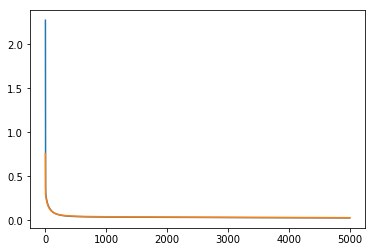

In [57]:
plt.plot(nn.history)
plt.plot(test_history)
plt.show()

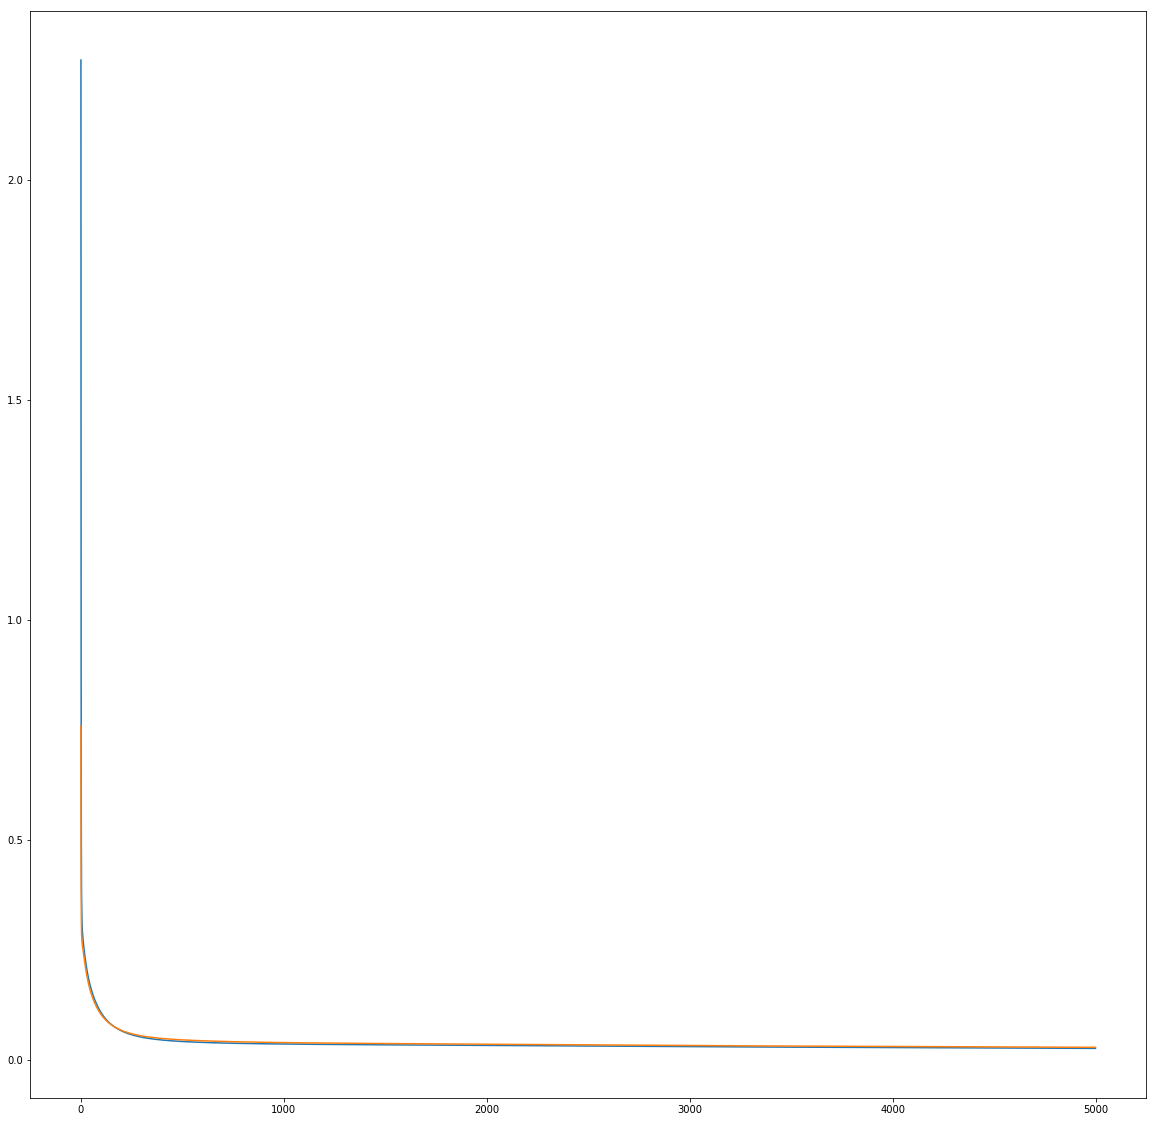

In [58]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.plot(nn.history)
ax.plot( test_history)

In [59]:
print(y)
print(nn.output)
print(y.shape)


[[-7.96453860e-01  6.87384489e-01  5.57366576e-01 -3.15290939e-01
   6.98719062e-01 -9.88391391e-01  8.53173733e-01 -9.93054589e-01
  -9.96262911e-01  6.35532086e-01 -1.75196443e-01 -5.06793034e-01
   3.44973534e-01  6.40375427e-01  9.16966002e-01 -8.13247185e-01
   3.12305044e-01  1.65900487e-01  3.14473221e-03  1.44153931e-01
   7.09880892e-01 -9.50471757e-01  7.44406046e-01 -8.29389112e-01
  -7.42302542e-01 -7.77046999e-01  4.14764781e-01 -7.40191697e-01
  -7.82950626e-01  9.82545587e-01  9.73406281e-01 -7.92634891e-01
   9.55241158e-01 -6.91938869e-01 -2.18358066e-01  6.05950876e-01
   9.74827847e-01  9.96262911e-01  7.27373642e-01 -9.86402137e-01
  -7.75063729e-01 -9.97922715e-01 -9.80127955e-01  9.99454898e-01
  -6.94205806e-01 -3.68475395e-01 -7.71074213e-01  9.89780716e-01
   2.55020076e-01  7.90713639e-01 -3.27203041e-01 -6.08449521e-01
   1.19215809e-01  8.98518156e-01 -7.63003834e-01 -6.78194336e-01
   6.73558927e-01 -1.47265105e-01 -7.94548304e-01 -9.60652602e-01
   4.76675

In [60]:
#print(test_history)

(1, 200) (1, 200) (1, 200)
(200, 3)
[-6.16997476 -6.15739581 -6.13223791 -5.99386947 -5.94355367 -5.93097472
 -5.90581682 -5.88065892 -5.85550102 -5.83034312]
[0.11296887 0.12545803 0.15037482 0.28529657 0.33313979 0.34497353
 0.36847539 0.39174405 0.41476478 0.43752301]


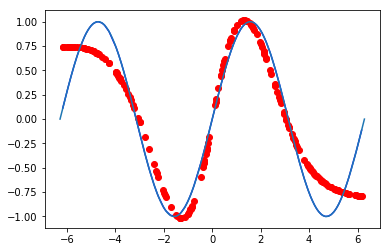

In [61]:
%matplotlib inline 

print(x_test.shape, y_test.shape,y_pred.shape)
z=np.zeros((x_test.shape[1],3))
z[:,0]=x_test[0,:]
z[:,1]=y_test[0,:]
z[:,2]=y_pred[0,:]
print(z.shape)
print(z[0:10,0])
print(z[0:10,1])

#z.sort(axis=0)
#xx=y_test[:,0].reshape(y_test.shape[0])
#yy=y_test[0,:].reshape(y_test.shape[0])

plt.plot(z[:,0],z[:,1],'b')
plt.plot(z[:,0],z[:,2],'ro')
z=np.zeros((x_train.shape[1],2))
z[:,0]=x_train[0,:]
z[:,1]=np.sin(z[:,0])
#z.sort(axis=0)
plt.plot(z[:,0],z[:,1])

plt.show()

In [62]:
print(x_test)

[[-6.16997476 -6.15739581 -6.13223791 -5.99386947 -5.94355367 -5.93097472
  -5.90581682 -5.88065892 -5.85550102 -5.83034312 -5.81776417 -5.71713258
  -5.69197468 -5.57876413 -5.46555359 -5.30202724 -5.28944829 -5.27686934
  -5.20139564 -5.113343   -5.02529035 -5.0127114  -4.9372377  -4.89950086
  -4.79886926 -4.78629031 -4.77371136 -4.74855346 -4.71081661 -4.68565871
  -4.54729027 -4.44665867 -4.27055338 -4.25797443 -3.98123754 -3.96865859
  -3.95607964 -3.94350069 -3.93092174 -3.88060594 -3.83029014 -3.81771119
  -3.79255329 -3.75481644 -3.65418485 -3.5661322  -3.4655006  -3.41518481
  -3.36486901 -3.27681636 -3.21392161 -3.06297422 -3.00007947 -2.98750052
  -2.77365838 -2.61013203 -2.39628989 -2.30823724 -2.2705004  -2.2201846
  -2.01892141 -1.98118456 -1.94344771 -1.90571086 -1.71702662 -1.47802657
  -1.45286867 -1.33965813 -1.32707918 -1.31450023 -1.28934233 -1.12581599
  -1.01260544 -1.00002649 -0.94971069 -0.89939489 -0.88681594 -0.8490791
  -0.83650015 -0.76102645 -0.47171061 -0

In [63]:
print(nn.history)

[2.2730843114607193, 0.882660866504462, 0.4990577762221163, 0.3809448775846432, 0.3368412638225194, 0.31563199078618664, 0.30279216165882, 0.29367466929660346, 0.2865068238953265, 0.2804734617708978, 0.2751432181062322, 0.2702688745295489, 0.26570336140168777, 0.2613579027978481, 0.25717872863435526, 0.25313334555837114, 0.24920222238331047, 0.245373695579569, 0.2416408336282824, 0.23799950531841205, 0.23444719150064722, 0.23098225697218885, 0.2276035074639819, 0.2243099233901331, 0.22110050322474165, 0.21797417487016932, 0.21492974916868235, 0.211965899485221, 0.20908115734141794, 0.20627391782811627, 0.20354245084483055, 0.20088491565494465, 0.19829937714256843, 0.19578382271969247, 0.19333617918942012, 0.19095432910187224, 0.18863612629237564, 0.18637941039633643, 0.18418202020965033, 0.18204180581837334, 0.17995663946309776, 0.17792442513587636, 0.17594310693292856, 0.17401067620616095, 0.17212517757168783, 0.17028471384470464, 0.1684874499778007, 0.16673161608455062, 0.16501550963

In [64]:
timestamp=dt.datetime.now()
print(repr((timestamp)))


datetime.datetime(2019, 3, 23, 22, 22, 5, 452544)


In [65]:
print(timestamp)


2019-03-23 22:22:05.452544


10 hidden nodes 
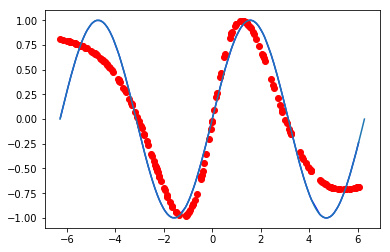

15 hidden nodes
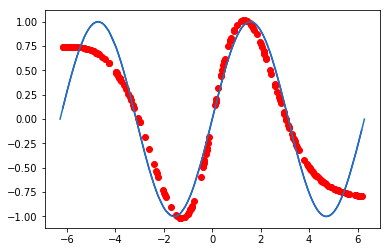